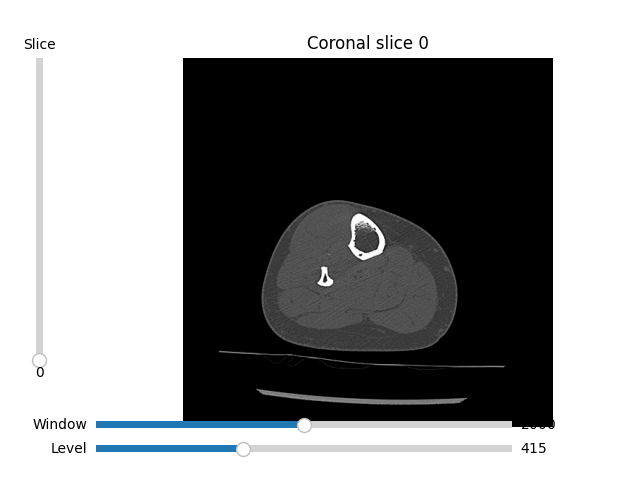

In [12]:
from typing import Tuple, Literal

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider         

%matplotlib widget

# assume load_ct_volume is defined elsewhere and returns a NumPy array shape (num, h, w)
knee = load_ct_volume(ct_dir)
num, h, w = knee.shape 

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, right=0.9)     # leave room for sliders

# initial display
DEFAULT_WINDOW = 2000.0
DEFAULT_LEVEL  =  415.0

def slice_view(volume: np.ndarray, view: Literal['axial','coronal','sagittal'], idx: int) -> np.ndarray:
    if volume.ndim != 3:
        raise ValueError("CT volume is not 3D")
    if view == 'axial':    return volume[idx, :, :] # xy plane
    if view == 'coronal':  return volume[:, idx, :] # xz plane
    if view == 'sagittal': return volume[:, :, idx] # yz plane 
    raise ValueError("View must be 'axial', 'coronal' or 'sagittal'")

def window_level_norm(image: np.ndarray, window: float, level: float) -> np.ndarray:
    lo, hi = level - window/2, level + window/2
    img = np.clip(image, lo, hi)
    return (img - lo) / (hi - lo)

# show the first slice
sl0   = slice_view(knee, 'axial', 0)
norm0 = window_level_norm(sl0, DEFAULT_WINDOW, DEFAULT_LEVEL)
im    = ax.imshow(norm0, cmap='gray', vmin=0, vmax=1) # aspect=(1.0/0.485) for coronal/sagittal; need to update this for aspect=['view']
ax.set_title('Coronal slice 0')
ax.axis('off')

# ─── sliders ────────────────────────────────────────────────────
axslice = fig.add_axes([0.05, 0.25, 0.0225, 0.63])
slice_slider = Slider(
    axslice, 'Slice', 0, num-1,
    valinit=0, valstep=1, orientation='vertical',
    valfmt='%0.0f'
)

axwin = fig.add_axes([0.15, 0.10, 0.65, 0.03])
win_slider = Slider(
    axwin, 'Window', 1, 4000,
    valinit=DEFAULT_WINDOW
)

axlev = fig.add_axes([0.15, 0.05, 0.65, 0.03])
lev_slider = Slider(
    axlev, 'Level', -1000, 3000,
    valinit=DEFAULT_LEVEL
)

def update(_):
    idx = int(slice_slider.val)
    w   = win_slider.val
    l   = lev_slider.val

    sl = slice_view(knee, 'axial', idx)
    # sl = sl.T                         # if you want to transpose
    # sl = np.flipud(sl)               # and flip it
    norm = window_level_norm(sl, w, l)

    # update the image data, not re-plot
    im.set_data(norm)
    ax.set_title(f'slice {idx}   W={w:.0f}, L={l:.0f}')
    fig.canvas.draw_idle()

slice_slider.on_changed(update)
win_slider.on_changed(update)
lev_slider.on_changed(update)

plt.show()
